***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [4]:
dados = pd.read_csv("dados.csv")       #criando a variavel com o nome dados e chamando a função 'pd' com 'read' para ler os arquivos 

### Visualize o conteúdo do DataFrame

In [5]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


# visualizamos os cinco primeiros com os dados.read()


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [26]:
classes = [                     #criando uma variavel com o nome classe e usando uma função built-in para chamar os valores da renda minimo e maximo assim definindo os intervalos
    dados.Renda.min(),
    2 * 788,                       
    5 * 788,    
    15 * 788,
    25 * 788,           
    dados.Renda.max()
]
classes

[0, 1576, 3940, 11820, 19700, 200000]

# criamos uma distribuição de frequências com a variável 'classe'

### 2º Definir os labels das classes

In [27]:
labels = ['E', 'D', 'C', 'B', 'A']      #criando uma lista com o nome labels para definir os labels da classe
                                        #começamos a lista pela letra "E" porque é a classe mais baixa 

# em seguida definimos as labels da classificação com a variável 'labels'

### 3º Construir a coluna de frequências

# construímos com a coluna de frequência com a variável frequência, utilizamos o 'value_conts()' e o 'cut()' para gerar as classes

In [73]:
frequencia = pd.value_counts(     #criando a tabela de frequências, chamando a função 'VALUE_CONTS' para efetuar a contagem dos dados.
    pd.cut(x = dados.Renda,       #o uso do 'CUT' para criar uma série e adicionar cada registro dentro da classe definida. (criar as classes)
           bins = classes,        #utilizando o 'BINS' para definir o número de intervalos que o histograma considera para criar as barras
           labels = labels,       #usado 'labels' para dar nome a cada linha que ira puxar da 'value_conts' 
           include_lowest= True)
)
frequencia

Renda
E    49755
D    18602
C     7241
B      822
A      420
Name: count, dtype: int64

### 4º Construir a coluna de percentuais

# aplicamos a mesma metodologia para construirmos a coluna de percentuais com a variável 'percentual' normalizada e multiplicada por 100 

In [74]:
percentual = pd.value_counts(      
    pd.cut(x = dados.Renda,
           bins = classes,
           labels = labels,
           include_lowest= True), # para incluir a classe inferior a 0 nas classes 
    normalize= True  # é utilizado para trazer a porcentagem dos dados 
)*100
percentual

Renda
E    64.751432
D    24.208745
C     9.423477
B     1.069755
A     0.546590
Name: proportion, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

# criamos a variável 'dist_freq', juntamos as duas colunas e ordenamos as linhas alfabeticamente de acordo com os labels de cada classe, utilizando .sort_index() com 'asceding' igual a FALSE

In [75]:
dist_freq = pd.DataFrame(
    {'Frequência ' : frequencia, 'Porcentagem (%)': percentual}) #criaçâo de variavel contendo o  aliase da biblioteca pandas ("pd") 
dist_freq.sort_index(ascending= False)   #utilizamos o sort_index que fará a classificação a partir do index do DataFrame, o index é usado para controlar em qual linha do DataFrame estamos.

,Frequência,Porcentagem (%)
Renda,,
A,420,0.546590
B,822,1.069755
C,7241,9.423477
D,18602,24.208745
E,49755,64.751432


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

In [76]:
dist_freq['Frequência'].plot.bar(width = 1, color = 'blue', alpha = 0.2, figsize=(14, 6))

KeyError: 'Frequência'

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

# criamos um Histograma com o 'distplot()' para as variáveis quantitativas de nosso dataset

C:\Users\fernanda_amaral\AppData\Local\Temp\ipykernel_9552\883494010.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados.Altura)


<Axes: title={'center': 'Distribuição de Frequências - Altura'}, xlabel='Metros', ylabel='Density'>

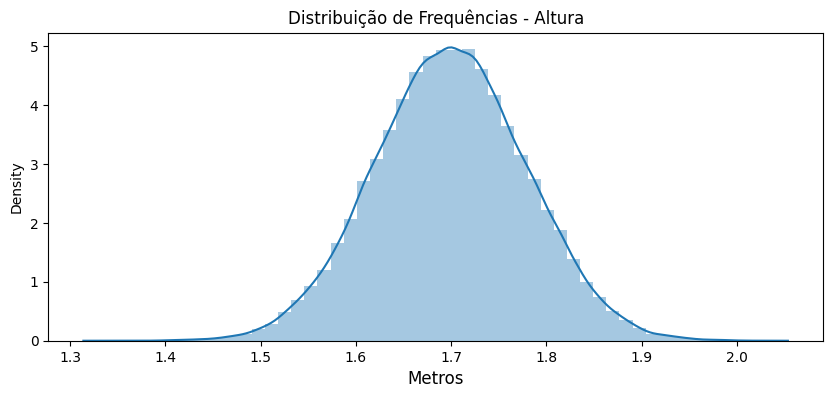

In [77]:
ax = sns.distplot(dados.Altura)

ax.figure.set_size_inches(10, 4)
ax.set_title('Distribuição de Frequências - Altura', fontsize = 12)
ax.set_xlabel('Metros', fontsize = 12)
ax

C:\Users\fernanda_amaral\AppData\Local\Temp\ipykernel_9552\3431039551.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados['Renda'])


<Axes: title={'center': 'Distribuição de Frequências - RENDA'}, xlabel='R$', ylabel='Density'>

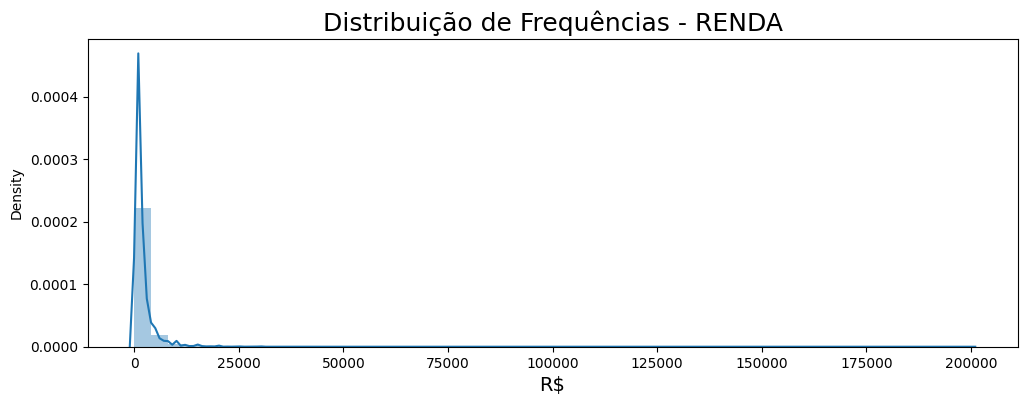

In [78]:
ax = sns.distplot(dados['Renda'])

ax.figure.set_size_inches(12, 4)
ax.set_title('Distribuição de Frequências - RENDA', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

C:\Users\fernanda_amaral\AppData\Local\Temp\ipykernel_9552\2506148277.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados['Idade'])


<Axes: title={'center': 'Distribuição de Frequências - IDADE'}, xlabel='Anos', ylabel='Density'>

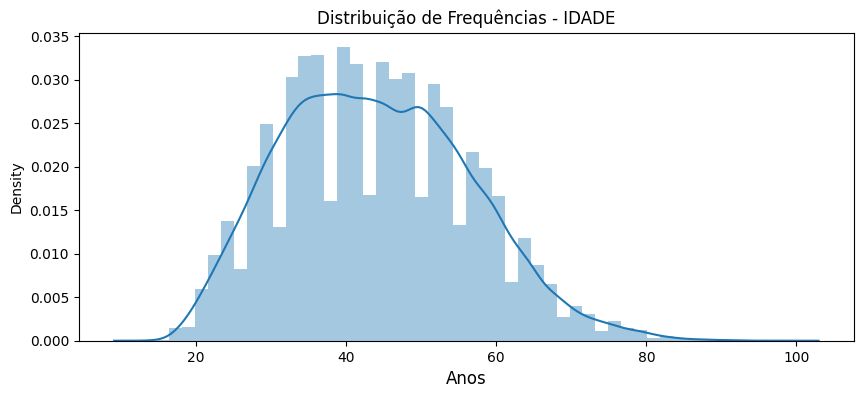

In [48]:
ax = sns.distplot(dados['Idade'])

ax.figure.set_size_inches(10, 4)
ax.set_title('Distribuição de Frequências - IDADE', fontsize = 12)
ax.set_xlabel('Anos', fontsize = 12)
ax

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

# para uma melhor visualização dos valores da Renda, faz uma seleção com 'query()' com pessoas cuja renda é <20000

C:\Users\fernanda_amaral\AppData\Local\Temp\ipykernel_2588\3096281769.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados.query('Renda < 20000')['Renda'])


<Axes: title={'center': 'Distribuição de Frequências - Renda - Pessoas com renda até R$ 20.000'}, xlabel='R$', ylabel='Density'>

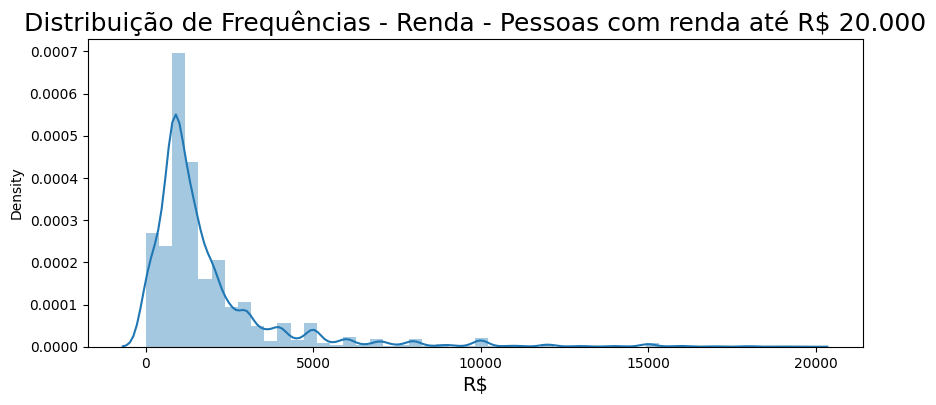

In [29]:
ax = sns.distplot(dados.query('Renda < 20000')['Renda'])
ax.figure.set_size_inches(10, 4)
ax.set_title('Distribuição de Frequências - Renda - Pessoas com renda até R$ 20.000', fontsize= 18)
ax.set_xlabel('R$', fontsize= 14)
ax


#outro modelo de fazer o histograma com rendimento até 20.000
#ax = sns.distplot(dados.query('Renda < 20000').Renda, kde= False)
#ax.figure.set_size_inches(10, 4)
#ax

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

# contrusção de uma Tabela de Frequências e de percentuais a partir de dicionários usados para nomearmos os registros de acordo com o dataset além do cruzamento das variáveis 'SEXO e COR'

In [8]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

# utilizamos os dicionários e geramos uma tabela 'frequencia' com o cruzamento das duas variáveis por meio do método 'crosstab()'

In [31]:
frequencia = pd.crosstab(dados.Sexo, #para construir uma tabela cruzando duas variaveis utiliza-se o metodo "crosstab()" passando as variaveis em seu parametro     
                         dados.Cor)
frequencia.rename(index = sexo, inplace= True)   #para salvar a mudança do nome do DataFrame utlizamos o "inplace= True"
frequencia.rename(index = cor, inplace= True)    
frequencia


Cor,0,2,4,6,8
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


# a mesma técnica foi usada para a construção da tabela de 'percentual' com a multiplicaçã por * 100

In [32]:
percentual = pd.crosstab(dados.Sexo, 
                         dados.Cor,
                         normalize= True) * 100
percentual.rename(index = sexo, inplace= True)
percentual.rename(index = cor, inplace= True)
percentual

Cor,0,2,4,6,8
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

# analise descritiva da variável 'Renda' e obtivemos sua média com o 'mean()', 'median()', 'mode()'

In [67]:
dados.Renda.mean()

2000.3831988547631

### Obtenha a mediana

In [68]:
dados.Renda.median()

1200.0

### Obtenha a moda

In [92]:
dados.Renda.mode()[0]

788

### Obtenha o desvio médio absoluto

# obtivemos o desvio médio com 'mad()', a variância com 'var()', desvio padrão com 'std()'.

In [85]:
media_absoluto = dados[['Renda']]

media_absoluto



,Renda
0,800
1,1150
2,880
3,3500
4,150
...,...
76835,812
76836,1500
76837,1300
76838,1500


### Obtenha a variância

In [97]:
dados.Renda.var()

11044906.006217021

### Obtenha o desvio-padrão

In [98]:
dados.Renda.std()

3323.3877303464037

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

# mediana e valor máximo da variável 'Renda' de acordo com o 'Sexo' e a 'Cor' por meio dos métodos 'crosstab()' novamente e do 'aggfunc()', o qual possui algumas variações de escrita de acordo com a versão do Pandas e recebe as três funções.'

In [33]:
renda_est_sc = pd.crosstab(dados.Cor,            #utilizando crosstab para calcular a tubulação com dois fatores (sexo, cor)
                           dados.Sexo,
                           values = dados.Renda,
                           aggfunc = {'mean', 'median', 'max'}) #função para realizar agregação 
renda_est_sc.rename(index = sexo, inplace= True)   # renomeando o 'index' com o nome sexo, utilizando o "inplace= True" para salvar a mudança de nome do DataFrame
renda_est_sc.rename(columns = cor, inplace= True)  # renomeando o 'columns' com o nome sexo, utilizando o "inplace= True" para salvar a mudança de nome do DataFrame

renda_est_sc

max                 mean                median        
Sexo      Indígena       1     Indígena            1 Indígena       1
Cor                                                                  
Masculino    10000  120000  1081.710938  2464.386139    797.5   788.0
2           200000  100000  2925.744435  2109.866750   1700.0  1200.0
4            50000   23000  1603.861687  1134.596400   1200.0   800.0
6            50000   20000  4758.251064  3027.341880   2800.0  1500.0
8           100000   30000  1659.577425  1176.758516   1200.0   800.0

# aqui fizemos basicamente o mesmo procedimento para o cálculo das Estatísticas de Dispersão, calculamos as medidas de desvio médio absoluto, variância e desvio padrão, nomeando linhas e colunas. 

# obs: faltou o método mad()

In [35]:
#OBTENHA AS MEDIDAS DE DISPERSÃO DA VARIÁVEL RENDA SEGUNDO SEXO E COR 
#O parâmetro aggfunc da função crosstab() pode receber uma lista de funções. Exemplo: aggfunc = {'mad', 'var', 'std'}

renda_disp_sc = pd.crosstab(dados.Cor, 
                            dados.Sexo,
                            aggfunc = {'var', 'std'},
                            values = dados.Renda).round(2)
renda_disp_sc.rename(index = cor, inplace = True)
renda_disp_sc.rename(columns = sexo, inplace = True)
renda_disp_sc

std                    var              
Sexo     Masculino  Feminino    Masculino      Feminino
Cor                                                    
Indígena   1204.09  11957.50   1449841.13  1.429818e+08
Branca     4750.79   3251.01  22570023.41  1.056909e+07
Preta      1936.31   1349.80   3749293.59  1.821960e+06
Amarela    5740.82   3731.17  32957069.62  1.392166e+07
Parda      2312.09   1596.23   5345747.15  2.547960e+06

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

# Passamos o X sendo a 'Renda', o Y como a 'Cor' e a diferenciação de acordo com o 'Sexo'. Por fim, configuraremos a visualização do gráfico com legendas.

# O método 'get_legend_handles_labels()' nos dá duas saídas, como uma tupla. O 'handles' com '_' nos passa a legenda da divisão entre 'Masculino' e 'Feminino' com valores vazios.

# Fizemos uma seleção de rendas até R$10.000,00 para podermos obter resultados de mais fácil leitura.

ValueError: The number of FixedLocator locations (5), usually from a call to set_ticks, does not match the number of labels (6).

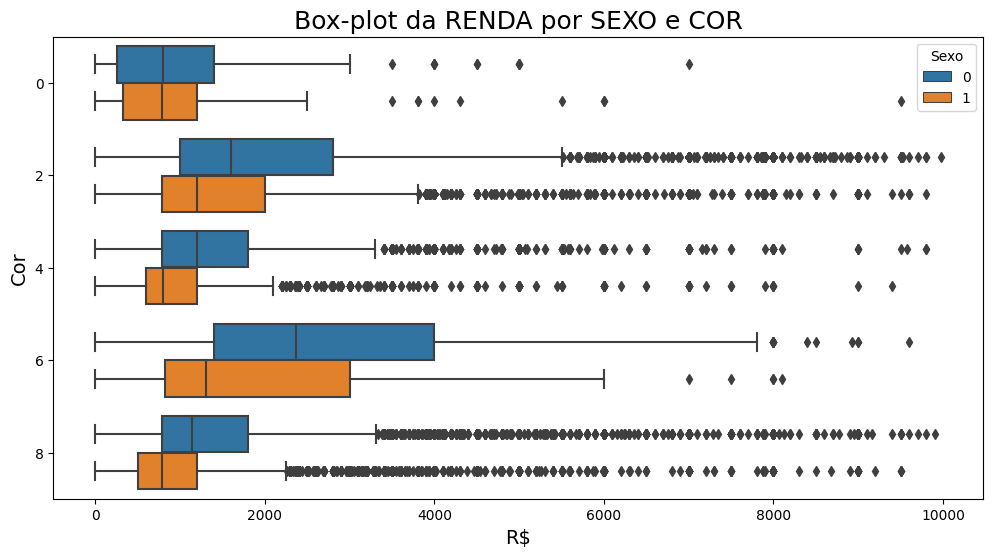

In [86]:
ax = sns.boxplot(x = 'Renda', y = 'Cor', hue = 'Sexo', data=dados.query('Renda < 10000'), orient='h')   #
#variavel para a criaçâo do boxplot contendo os parametros X e Y passando os dados de RENDA e COR e utilizando o parâmetro HUE para incluir a variável na subdivisão 


ax.figure.set_size_inches(12, 6)    # Personalizando o tamanho da figura
ax.set_title('Box-plot da RENDA por SEXO e COR', fontsize=18)    # Configurando o título do gráfico
ax.set_xlabel('R$', fontsize=14)    # Configurando o label do eixo X
ax.set_ylabel('Cor', fontsize=14)    # Configurando o label do eixo Y

ax.set_yticklabels(['Indígena', 'Branca', 'Preta', 'Amarela', 'Parda', 'Sem declaração'], fontsize=12)    # Configurando o label de cada categoria do eixo Y

# Configurações da legenda do gráfico (Sexo)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Feminino'], fontsize=12)

ax

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


# importamos 'stats' de 'scipy' e calculamos por meio da função 'stats.percentileofscore()' recebendo a Renda de dados, o valor de corte 788 do salário mínimo e o kind igual a 'weak'.

# Não utilizamos os percentis, pois teríamos que continuar dividindo em mais partes até chegarmos em um valor exato.

# O método 'percentileofscore()' nos permite pegar este valor rapidamente.

In [18]:
from scipy import stats    #o modulo stats fornece funções para o cálculo de estatísticas matemáticas de dados númericos (para valores tipo real)

percentual = stats.percentileofscore(dados.Renda, 788, kind='weak')   #variavel percentual com o método "STATS" passando o "percentileofscore" para calcular o percentual em relação a lista, com os
print('{0:.2f}%'.format(percentual))                                  #parametros da renda e o valor passando o                                                                                                                           


28.87%


### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

# calculamos o valor máximo que 99% das pessoas ganham em nosso dataset. Utilizaremos a função 'quantile()' recebendo .99 que cortará os 1% acima. Depois, imprimiremos o valor formatado em reais

In [6]:
valor = dados.Renda.quantile(.99)     #passando o método quantile para retornar o valor ou dado do conjunto de dados 
print("R${0:.2f}".format(valor))   

R$15000.00


### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

# obtemos a média, mediana, valor máximo e desvio padrão de Renda de acordo com os Anos de Estudo e Sexo, utilizando o 'crosstab()' e 'aggfunc()' novamente.

In [9]:
mmvd = pd.crosstab(dados.Sexo,
                   dados['Anos de Estudo'],
                   aggfunc = ['mean', 'median', 'std'],
                   values = dados.Renda)
mmvd.rename(index = sexo, inplace=True) 
mmvd.rename(columns = anos_de_estudo, inplace=True)

mmvd

mean                           
Anos de Estudo Sem instrução e menos de 1 ano       1 ano      2 anos   
Sexo                                                                    
Masculino                          799.494638  895.629047  931.178986  \
Feminino                           516.201748  492.771987  529.911638   

                                                                     
Anos de Estudo       3 anos       4 anos       5 anos       6 anos   
Sexo                                                                 
Masculino       1109.203862  1302.329283  1338.653218  1448.875419  \
Feminino         546.853916   704.279111   781.389776   833.732824   

                                                      ...          std   
Anos de Estudo       7 anos       8 anos      9 anos  ...       7 anos   
Sexo                                                  ...                
Masculino       1465.497940  1639.396667  1508.03885  ...  1419.708673  \
Feminino         830.751004   933.615351   868.02170  ...   602.038029   

                                                                     
Anos de Estudo       8 anos       9 anos      10 anos      11 anos   
Sexo                                                                 
Masculino       1515.583715  2137.664774  2078.609734  2676.538942  \
Feminino         896.781213   973.221652   620.611907  1819.040417   

                                                                        
Anos de Estudo      12 anos      13 anos      14 anos 15 anos ou mais   
Sexo                                                                    
Masculino       2268.081538  2797.116800  3987.214974     7447.613594  \
Feminino        4851.833513  2053.789771  2064.083336     4212.770709   

                                 
Anos de Estudo Não determinados  
Sexo                             
Masculino            979.648745  
Feminino             459.985964  

[2 rows x 51 columns]

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

# construímos o boxplot da variável Renda de acordo com os Anos de Estudo e Sexo.

# Em 'set_yticklabels()', passamos uma lista com os valores dos 'anos_de_estudo' com 'values()' por meio de for para os valores com os nomes dos registros.

<Axes: title={'center': 'Box-plot da RENDA por ANOS DE ESTUDOS e SEXO'}, xlabel='R$', ylabel='Anos de Estudo'>

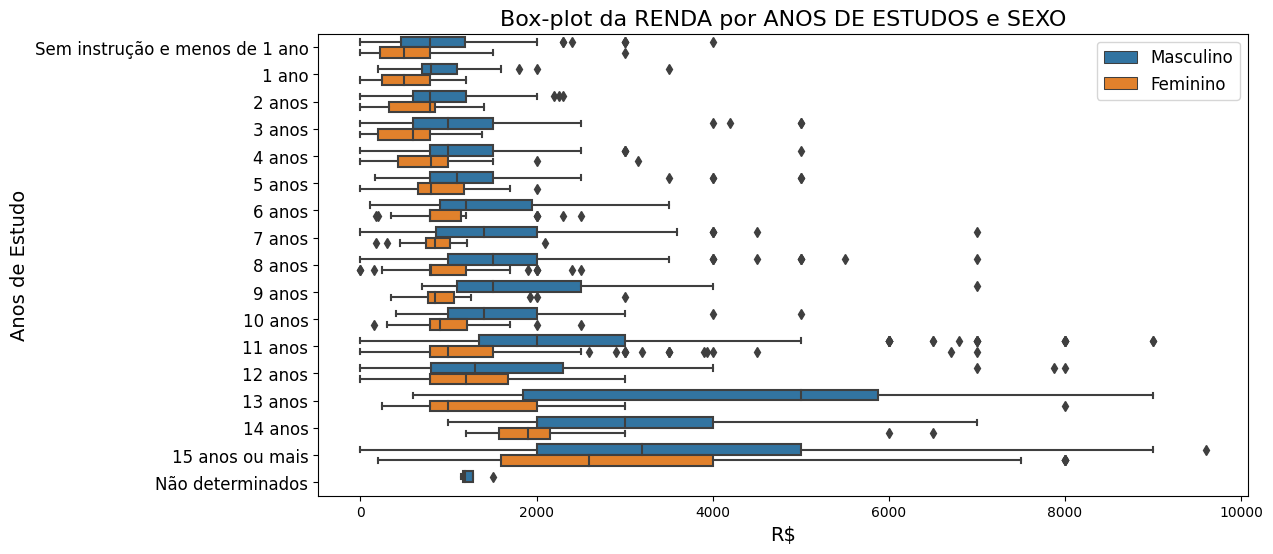

In [15]:
ax = sns.boxplot(x = 'Renda', y = 'Anos de Estudo', hue = 'Sexo', data= dados.query('Renda < 10000 and Idade == 50'), orient= 'h')

ax.figure.set_size_inches(12, 6)  #personalizando o tamanho da figura 
ax.set_title('Box-plot da RENDA por ANOS DE ESTUDOS e SEXO', fontsize =16)  #configurando o título do gráfico 
ax.set_xlabel('R$', fontsize =14)  #configurando a label do eixo X 
ax.set_ylabel('Anos de Estudo', fontsize =14)   #configurando a label do eixo Y 


ax.set_yticklabels([key for key in anos_de_estudo.values()], fontsize =12) #configurando a label de cada categoria do eixo Y 

#configurações da legenda do gráfico ( SEXO )
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Feminino'], fontsize = 12)

ax


### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

# teremos a média, mediana, valor máximo e desvio padrão da variável Renda agrupadas por UF.

# utilizamos o groupby() e o agg() conforme as dicas escritas no notebook.

In [16]:
renda_UF = dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})
renda_UF.rename(index = uf)

Renda                             
                            mean  median     max          std
UF                                                           
Rondônia             1789.761223  1200.0   50000  2406.161161
Acre                 1506.091782   900.0   30000  2276.233415
Amazonas             1445.130100   900.0   22000  1757.935591
Roraima              1783.588889  1000.0   20000  2079.659238
Pará                 1399.076871   850.0   50000  2053.779555
Amapá                1861.353516  1200.0   15580  2020.688632
Tocantins            1771.094946  1000.0   60000  2934.590741
Maranhão             1019.432009   700.0   30000  1887.816905
Piauí                1074.550784   750.0   40000  2373.355726
Ceará                1255.403692   789.0   25000  1821.963536
Rio Grande do Norte  1344.721480   800.0   15500  1651.805500
Paraíba              1293.370487   788.0   30000  1950.272431
Pernambuco           1527.079319   900.0   50000  2389.622497
Alagoas              1144.552602   788.0   11000  1237.856197
Sergipe              1109.111111   788.0   16000  1478.997878
Bahia                1429.645094   800.0  200000  3507.917248
Minas Gerais         2056.432084  1200.0  100000  3584.721547
Espírito Santo       2026.383852  1274.0  100000  3513.846868
Rio de Janeiro       2496.403168  1400.0  200000  5214.583518
São Paulo            2638.104986  1600.0   80000  3503.777366
Paraná               2493.870753  1500.0  200000  4302.937995
Santa Catarina       2470.854945  1800.0   80000  3137.651112
Rio Grande do Sul    2315.158336  1500.0   35000  2913.335783
Mato Grosso do Sul   2262.604167  1500.0   42000  3031.419122
Mato Grosso          2130.652778  1500.0   35000  2542.630178
Goiás                1994.580794  1500.0   30000  2221.933065
Distrito Federal     4241.954722  2000.0  100000  5550.463338

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

# construímos um 'boxplot()' desses dados com uma seleção de até R$10.000,00 de rendimento mensal.

# poderemos tirar diversas conclusões sobre as características de distribuição da variável.

# É possível sempre fazermos diversas análises com esses conhecimentos estatísticos, inclusive com outros datasets.

<Axes: title={'center': 'Box-plot da Renda por UNIDADES DA FEDERAÇÃO'}, xlabel='R$', ylabel='Estados'>

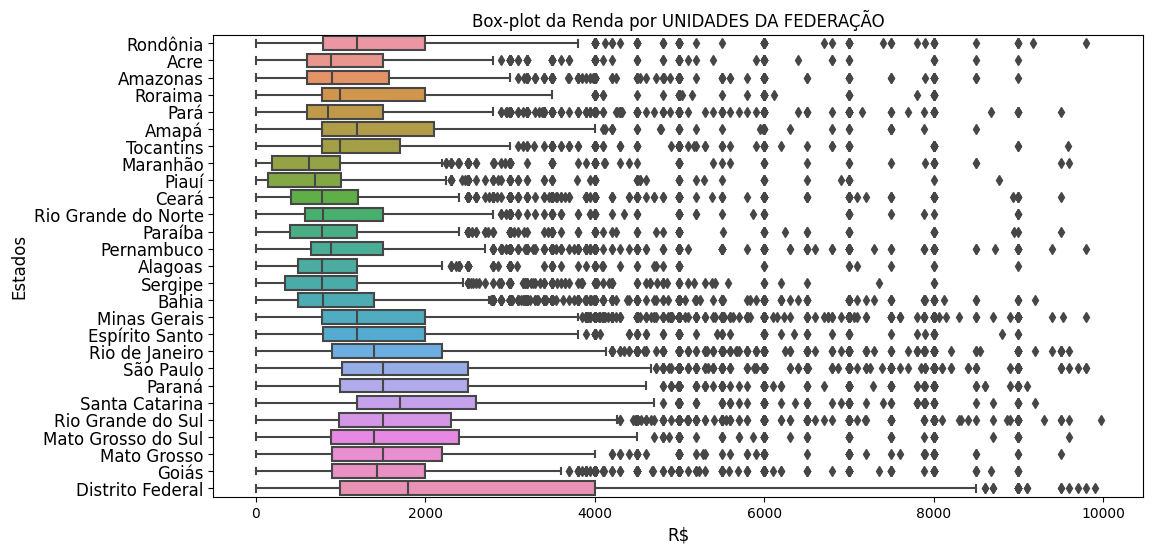

In [20]:
ax = sns.boxplot(x = 'Renda', y = 'UF', data= dados.query("Renda < 10000"), orient= 'h')

ax.figure.set_size_inches(12, 6)  #personalizando o tamanho da figura 
ax.set_title('Box-plot da Renda por UNIDADES DA FEDERAÇÃO')  #configurando o titulo do gráfico 
ax.set_xlabel('R$', fontsize = 12) #configurando o label do eixo X
ax.set_ylabel('Estados', fontsize = 12)  #configurando o label do eixo Y



#configurando a label da categoria do eixo Y 
ax.set_yticklabels([key for key in uf.values()], fontsize =12)

ax

